# 신용카드 사기탐지모델

* trans_date_trans_time : 거래 시간
* cc_num : 카드 번호. 고유값이기 때문에 여기서는 id처럼 활용할 수 있습니다.
* merchant : 거래 상점* 
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* amt : 거래 금액
* first / last : 이름
* gender : 성별
* street / state / zip : 고객 거주지 정보
* lat / long : 고객 주소에 대한 위도 및 경도
* city_pop : 고객이 zipcode에 속하는 인구 수
* job : 직업
* dob : 생년월일
* trans_num : 거래번호
* unix_time : 거래 시간(유닉스 타임스탬프 형식)
* merch_lat / merch_long : 상점 위치에 대한 위도 및 경도
* is_fraud : 사기거래 여부 (종속변수)

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

ModuleNotFoundError: No module named 'sklearnex'

이건 만약에 된다고 하면 할것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import koreanize_matplotlib
import seaborn as sbn

In [2]:
data = pd.read_csv("./data/fraud.csv")

In [3]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

In [5]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0


In [167]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [168]:
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [113]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000
mean,417386038393710400.000,70.064,48813.258,38.539,-90.228,88643.675,1358674218.834,38.539,-90.228,0.005
std,1309115265318734848.000,159.254,26881.846,5.071,13.748,301487.618,18195081.388,5.106,13.760,0.072
min,60416207185.000,1.000,1257.000,20.027,-165.672,23.000,1325376018.000,19.027,-166.672,0.000
25%,180042946491150.000,9.640,26237.000,34.669,-96.798,741.000,1343016823.750,34.740,-96.899,0.000
50%,3521417320836166.000,47.450,48174.000,39.354,-87.477,2443.000,1357089331.000,39.369,-87.441,0.000
75%,4642255475285942.000,83.100,72042.000,41.940,-80.158,20328.000,1374581485.250,41.956,-80.245,0.000
max,4992346398065154048.000,28948.900,99921.000,66.693,-67.950,2906700.000,1388534374.000,67.510,-66.951,1.000


* 찾으려는 'is_fraud'데이터 수가 현저히 적다. 이런 상황에서 답을 찾아야한다.

In [114]:
obj_cols = data.select_dtypes(include = 'object')
num_cols =  data.select_dtypes(exclude = 'object')

In [69]:
for col in obj_cols:
    print('-'*30,col,'-'*30)
    print(data[col].nunique(), data[col].unique(), end="\n\n")
    print(data[col].value_counts(), end="\n\n")
    print(data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False), end="\n\n")
    

------------------------------ trans_date_trans_time ------------------------------
1819551 ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-12-31 23:59:15' '2020-12-31 23:59:24' '2020-12-31 23:59:34']

trans_date_trans_time
2020-10-05 19:37:49    4
2020-06-02 12:47:07    4
2020-06-01 01:37:47    4
2020-12-13 17:53:47    4
2019-04-22 16:02:01    4
                      ..
2019-01-01 00:21:32    1
2020-01-02 02:44:57    1
2019-01-01 00:22:18    1
2020-01-02 02:48:44    1
2020-01-02 02:49:16    1
Name: count, Length: 1819551, dtype: int64

                       is_fraud
trans_date_trans_time          
2019-11-30 17:58:27       1.000
2019-11-30 15:30:39       1.000
2019-11-30 14:13:18       1.000
2019-11-30 11:36:11       1.000
2020-06-28 06:58:06       1.000
...                         ...
2019-01-01 00:21:32       0.000
2020-01-02 02:44:57       0.000
2019-01-01 00:22:18       0.000
2020-01-02 02:48:44       0.000
2020-01-02 02:49:16       0.000

[1819551 r

In [70]:
for col in num_cols :
    print('-'*30,col,'-'*30)
    print(data[col].describe())
    print(data[col].value_counts(), end="\n\n")
    print(data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False), end="\n\n")

------------------------------ cc_num ------------------------------
count               1852394.000
mean     417386038393710400.000
std     1309115265318734848.000
min             60416207185.000
25%         180042946491150.000
50%        3521417320836166.000
75%        4642255475285942.000
max     4992346398065154048.000
Name: cc_num, dtype: float64
cc_num
30270432095985      4392
6538441737335434    4392
4642255475285942    4386
6538891242532018    4386
4364010865167176    4386
                    ... 
501894933032           7
4975457191020          7
6577777028615915       7
180097223252063        7
4295296907373          6
Name: count, Length: 999, dtype: int64

                     is_fraud
cc_num                       
4659625317833446364     1.000
4714017207228610634     1.000
6517779374888867        1.000
5301645381939419        1.000
503886119844            1.000
...                       ...
30026790933302          0.000
3506592072985012        0.000
4128730454058057622     

ValueError: Grouper for 'is_fraud' not 1-dimensional

* 이상값이 특이점이므로 이를 증폭할 수 있게끔 데이터를 다시 재구성한다.
* 현재의 데이터 중에 유효한 것들이 거의 없다.

In [6]:
data[data['state']== 'DE']

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
233631,2019-04-28 00:41:37,6011826317034777,fraud_Schamberger-O'Keefe,grocery_pos,294.910,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,8f85e701f609911b99bea627eb71aa49,1335573697,38.167,-75.023,1
233744,2019-04-28 01:49:28,6011826317034777,fraud_Kuphal-Predovic,misc_net,868.290,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,8c941f2849ccac44d32ef08ea784fc67,1335577768,38.911,-74.857,1
233826,2019-04-28 02:33:09,6011826317034777,fraud_Goodwin-Nitzsche,grocery_pos,280.260,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,0fc1109cb9a10961595e79736ccc1293,1335580389,38.523,-74.461,1
234625,2019-04-28 10:24:34,6011826317034777,"fraud_Huel, Hammes and Witting",grocery_pos,296.250,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,b4248cfc8b44fec6193767918d49b334,1335608674,38.594,-76.031,1
236522,2019-04-28 23:03:24,6011826317034777,fraud_Waters-Cruickshank,health_fitness,20.580,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,567ed9b2d7d10ad519cdd697cd338f70,1335654204,39.004,-75.852,1
236643,2019-04-28 23:41:43,6011826317034777,fraud_Cormier LLC,shopping_net,1012.770,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,00d158609d7ac753da792e9d0eb88a0b,1335656503,39.596,-75.559,1
237095,2019-04-29 03:29:41,6011826317034777,fraud_Ruecker Group,misc_net,885.960,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,e0613e4142b2d05867299832ac453e01,1335670181,39.666,-76.359,1
237740,2019-04-29 10:13:47,6011826317034777,fraud_Smitham-Schiller,grocery_net,10.930,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,788a8fea8199a4e8a6a47ffab824e571,1335694427,37.692,-76.058,1
239854,2019-04-29 23:51:22,6011826317034777,"fraud_Baumbach, Feeney and Morar",shopping_net,960.490,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,19947,38.679,-75.393,18799,"Designer, multimedia",2000-03-16,4193b953223a1c9432f9d3c380e67be9,1335743482,39.073,-75.545,1


카드별(고객) 거래 금액에서의 이상치를 찾고 is_fraund 와의 관계 찾기

In [7]:
(data[['is_fraud','cc_num']].groupby('cc_num').mean().sort_values(by='is_fraud', ascending=False) == 1).sum()

is_fraud    91
dtype: int64

* 91개 카드가 도난중

In [8]:
data[['is_fraud','cc_num']].groupby('cc_num').mean().sort_values(by='is_fraud', ascending=False)

,is_fraud
cc_num,
4659625317833446364,1.000
4714017207228610634,1.000
6517779374888867,1.000
5301645381939419,1.000
503886119844,1.000
...,...
30026790933302,0.000
3506592072985012,0.000
4128730454058057622,0.000


In [9]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
amt_desc = data.groupby(['cc_num'])['amt'].describe()

In [11]:
data.groupby(['cc_num'])['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
cc_num,,,,,,,,
60416207185,2196.000,59.258,142.870,1.020,7.560,36.540,72.802,3437.460
60422928733,2200.000,65.483,92.043,1.010,9.075,51.405,87.085,1290.370
60423098130,738.000,96.376,1000.694,1.010,8.780,35.425,75.463,27119.770
60427851591,743.000,107.488,131.015,8.860,59.140,76.670,99.110,1164.360
60487002085,735.000,64.097,153.208,1.020,8.095,35.670,70.855,2758.460
...,...,...,...,...,...,...,...,...
4958589671582726883,2191.000,67.206,137.504,1.000,8.830,50.130,84.455,4292.860
4973530368125489546,1467.000,75.789,258.847,1.010,9.435,52.660,88.340,8749.440
4980323467523543940,736.000,70.709,119.903,1.010,8.465,42.515,83.458,1327.430


In [13]:
data[['cc_num','amt']].groupby(['cc_num']).describe()

amt                                               \
                       count    mean      std   min    25%    50%     75%   
cc_num                                                                      
60416207185         2196.000  59.258  142.870 1.020  7.560 36.540  72.802   
60422928733         2200.000  65.483   92.043 1.010  9.075 51.405  87.085   
60423098130          738.000  96.376 1000.694 1.010  8.780 35.425  75.463   
60427851591          743.000 107.488  131.015 8.860 59.140 76.670  99.110   
60487002085          735.000  64.097  153.208 1.020  8.095 35.670  70.855   
...                      ...     ...      ...   ...    ...    ...     ...   
4958589671582726883 2191.000  67.206  137.504 1.000  8.830 50.130  84.455   
4973530368125489546 1467.000  75.789  258.847 1.010  9.435 52.660  88.340   
4980323467523543940  736.000  70.709  119.903 1.010  8.465 42.515  83.458   
4989847570577635369 1471.000  93.009  128.397 1.030 19.940 57.170 111.945   
4992346398065154184 2922.000  66.456  140.983 1.020  9.062 41.960  82.990   

                               
                          max  
cc_num                         
60416207185          3437.460  
60422928733          1290.370  
60423098130         27119.770  
60427851591          1164.360  
60487002085          2758.460  
...                       ...  
4958589671582726883  4292.860  
4973530368125489546  8749.440  
4980323467523543940  1327.430  
4989847570577635369  1223.850  
4992346398065154184  4669.070  

[999 rows x 8 columns]

In [14]:
amt_desc.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [15]:
amt_desc['iqr_max'] = amt_desc['75%'] + (1.5*(amt_desc['75%']-amt_desc['25%']))
amt_desc

,count,mean,std,min,25%,50%,75%,max,iqr_max
cc_num,,,,,,,,,
60416207185,2196.000,59.258,142.870,1.020,7.560,36.540,72.802,3437.460,170.666
60422928733,2200.000,65.483,92.043,1.010,9.075,51.405,87.085,1290.370,204.100
60423098130,738.000,96.376,1000.694,1.010,8.780,35.425,75.463,27119.770,175.486
60427851591,743.000,107.488,131.015,8.860,59.140,76.670,99.110,1164.360,159.065
60487002085,735.000,64.097,153.208,1.020,8.095,35.670,70.855,2758.460,164.995
...,...,...,...,...,...,...,...,...,...
4958589671582726883,2191.000,67.206,137.504,1.000,8.830,50.130,84.455,4292.860,197.892
4973530368125489546,1467.000,75.789,258.847,1.010,9.435,52.660,88.340,8749.440,206.697
4980323467523543940,736.000,70.709,119.903,1.010,8.465,42.515,83.458,1327.430,195.946


In [16]:
amt_desc = amt_desc.reset_index()

In [17]:
amt_desc.columns

Index(['cc_num', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'iqr_max'],
      dtype='object')

In [18]:
amt_desc.columns = ['cc_num', 'count', 'amt_mean', 'amt_std', 'min', '25%', '50%', '75%', 'max',
       'amt_iqr_max']

In [19]:
amt_desc

,cc_num,count,amt_mean,amt_std,min,25%,50%,75%,max,amt_iqr_max
0,60416207185,2196.000,59.258,142.870,1.020,7.560,36.540,72.802,3437.460,170.666
1,60422928733,2200.000,65.483,92.043,1.010,9.075,51.405,87.085,1290.370,204.100
2,60423098130,738.000,96.376,1000.694,1.010,8.780,35.425,75.463,27119.770,175.486
3,60427851591,743.000,107.488,131.015,8.860,59.140,76.670,99.110,1164.360,159.065
4,60487002085,735.000,64.097,153.208,1.020,8.095,35.670,70.855,2758.460,164.995
...,...,...,...,...,...,...,...,...,...,...
994,4958589671582726883,2191.000,67.206,137.504,1.000,8.830,50.130,84.455,4292.860,197.892
995,4973530368125489546,1467.000,75.789,258.847,1.010,9.435,52.660,88.340,8749.440,206.697
996,4980323467523543940,736.000,70.709,119.903,1.010,8.465,42.515,83.458,1327.430,195.946
997,4989847570577635369,1471.000,93.009,128.397,1.030,19.940,57.170,111.945,1223.850,249.952


In [20]:
data = pd.merge(data,amt_desc[['cc_num',  'amt_mean', 'amt_std','amt_iqr_max']], how='left', on='cc_num')
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0,89.409,127.530,256.620
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0,56.078,159.202,158.060
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0,69.924,116.689,210.800
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0,80.090,280.078,193.098
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0,95.341,94.323,149.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.493,-91.891,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.947,-91.333,0,62.348,110.821,182.535
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.039,-95.440,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661,-96.187,0,50.452,168.361,136.045
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.197,-118.902,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658,-119.715,0,88.704,119.949,261.548
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.626,-116.449,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.471,-117.081,0,60.998,89.526,186.940


In [21]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_mean', 'amt_std', 'amt_iqr_max'],
      dtype='object')

In [22]:
data = data.drop(['first', 'last','street', 'city', 'state', 'zip','trans_num', 'unix_time'], axis=1)
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,F,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,36.011,-82.048,0,89.409,127.530,256.620
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,F,48.888,-118.210,149,Special educational needs teacher,1978-06-21,49.159,-118.186,0,56.078,159.202,158.060
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,M,42.181,-112.262,4154,Nature conservation officer,1962-01-19,43.151,-112.154,0,69.924,116.689,210.800
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,M,46.231,-112.114,1939,Patent attorney,1967-01-12,47.034,-112.561,0,80.090,280.078,193.098
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,M,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,38.675,-78.632,0,95.341,94.323,149.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,M,40.493,-91.891,519,Town planner,1966-02-13,39.947,-91.333,0,62.348,110.821,182.535
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,M,29.039,-95.440,28739,Futures trader,1999-12-27,29.661,-96.187,0,50.452,168.361,136.045
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,F,46.197,-118.902,3684,Musician,1981-11-29,46.658,-119.715,0,88.704,119.949,261.548
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,M,44.626,-116.449,129,Cartographer,1965-12-15,44.471,-117.081,0,60.998,89.526,186.940


유닉스 타임을 넣는 것이 트렌스데이츠보다 더 낫지 않을지..?

In [23]:
data.loc[data['amt'] > data['amt_iqr_max'],'is_fraud'].mean() *100

np.float64(8.316776198481838)

In [24]:
data['amt_zscore'] = (data['amt']- data['amt_mean'])/data['amt_std']

In [25]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max,amt_zscore
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,F,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,36.011,-82.048,0,89.409,127.530,256.620,-0.662
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,F,48.888,-118.210,149,Special educational needs teacher,1978-06-21,49.159,-118.186,0,56.078,159.202,158.060,0.321
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,M,42.181,-112.262,4154,Nature conservation officer,1962-01-19,43.151,-112.154,0,69.924,116.689,210.800,1.287
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,M,46.231,-112.114,1939,Patent attorney,1967-01-12,47.034,-112.561,0,80.090,280.078,193.098,-0.125
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,M,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,38.675,-78.632,0,95.341,94.323,149.974,-0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,M,40.493,-91.891,519,Town planner,1966-02-13,39.947,-91.333,0,62.348,110.821,182.535,-0.168
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,M,29.039,-95.440,28739,Futures trader,1999-12-27,29.661,-96.187,0,50.452,168.361,136.045,0.365
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,F,46.197,-118.902,3684,Musician,1981-11-29,46.658,-119.715,0,88.704,119.949,261.548,-0.015
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,M,44.626,-116.449,129,Cartographer,1965-12-15,44.471,-117.081,0,60.998,89.526,186.940,-0.592


In [26]:
data[(data['amt_zscore'] > 3) | (data['amt_zscore'] < -3)]['is_fraud'].value_counts()

is_fraud
0    21725
1     4092
Name: count, dtype: int64

In [27]:
4092/(21725+4092) * 100

15.850021303792076

In [28]:
data[(data['amt_zscore'] > 3) | (data['amt_zscore'] < -3)]['is_fraud'].mean()

np.float64(0.15850021303792075)

# 사용자가 주로 어디에 지출하나
* 식품에 지출이 많은 사람, 레저용품에 지출을 갑자기 많이 한다??
* 평소 지출하는 카테고리 혹은 가게가 아닌 경우
* 카드 번호별, 카테고리별 지출 평균, 표준편차

In [29]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_mean', 'amt_std', 'amt_iqr_max',
       'amt_zscore'],
      dtype='object')

In [30]:
data.groupby(['cc_num', 'category'])['amt']

In [31]:
cat_amt = data.groupby(['cc_num', 'category'])['amt'].agg(['mean','std']).reset_index()
cat_amt

,cc_num,category,mean,std
0,60416207185,entertainment,51.839,65.486
1,60416207185,food_dining,26.737,46.383
2,60416207185,gas_transport,59.779,15.758
3,60416207185,grocery_net,52.153,17.695
4,60416207185,grocery_pos,101.558,21.894
...,...,...,...,...
13166,4992346398065154184,misc_pos,60.003,167.226
13167,4992346398065154184,personal_care,48.777,49.524
13168,4992346398065154184,shopping_net,86.280,217.047
13169,4992346398065154184,shopping_pos,64.213,169.239


In [32]:
cat_amt.columns

Index(['cc_num', 'category', 'mean', 'std'], dtype='object')

In [33]:
cat_amt.columns = ['cc_num', 'category', 'cat_mean', 'cat_std']

In [34]:
data= pd.merge(data, cat_amt, how='left', on = ['cc_num', 'category'])
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max,amt_zscore,cat_mean,cat_std
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,F,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,36.011,-82.048,0,89.409,127.530,256.620,-0.662,84.861,116.070
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,F,48.888,-118.210,149,Special educational needs teacher,1978-06-21,49.159,-118.186,0,56.078,159.202,158.060,0.321,99.637,23.904
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,M,42.181,-112.262,4154,Nature conservation officer,1962-01-19,43.151,-112.154,0,69.924,116.689,210.800,1.287,46.653,60.385
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,M,46.231,-112.114,1939,Patent attorney,1967-01-12,47.034,-112.561,0,80.090,280.078,193.098,-0.125,61.537,15.747
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,M,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,38.675,-78.632,0,95.341,94.323,149.974,-0.566,35.481,4.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,M,40.493,-91.891,519,Town planner,1966-02-13,39.947,-91.333,0,62.348,110.821,182.535,-0.168,45.931,45.150
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,M,29.039,-95.440,28739,Futures trader,1999-12-27,29.661,-96.187,0,50.452,168.361,136.045,0.365,50.924,52.342
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,F,46.197,-118.902,3684,Musician,1981-11-29,46.658,-119.715,0,88.704,119.949,261.548,-0.015,63.857,52.309
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,M,44.626,-116.449,129,Cartographer,1965-12-15,44.471,-117.081,0,60.998,89.526,186.940,-0.592,8.192,27.244


In [35]:
data = data.drop(['mean', 'std'], axis=1)

KeyError: "['mean', 'std'] not found in axis"

In [36]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max,amt_zscore,cat_mean,cat_std
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,F,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,36.011,-82.048,0,89.409,127.530,256.620,-0.662,84.861,116.070
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,F,48.888,-118.210,149,Special educational needs teacher,1978-06-21,49.159,-118.186,0,56.078,159.202,158.060,0.321,99.637,23.904
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,M,42.181,-112.262,4154,Nature conservation officer,1962-01-19,43.151,-112.154,0,69.924,116.689,210.800,1.287,46.653,60.385
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,M,46.231,-112.114,1939,Patent attorney,1967-01-12,47.034,-112.561,0,80.090,280.078,193.098,-0.125,61.537,15.747
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,M,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,38.675,-78.632,0,95.341,94.323,149.974,-0.566,35.481,4.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,M,40.493,-91.891,519,Town planner,1966-02-13,39.947,-91.333,0,62.348,110.821,182.535,-0.168,45.931,45.150
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,M,29.039,-95.440,28739,Futures trader,1999-12-27,29.661,-96.187,0,50.452,168.361,136.045,0.365,50.924,52.342
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,F,46.197,-118.902,3684,Musician,1981-11-29,46.658,-119.715,0,88.704,119.949,261.548,-0.015,63.857,52.309
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,M,44.626,-116.449,129,Cartographer,1965-12-15,44.471,-117.081,0,60.998,89.526,186.940,-0.592,8.192,27.244


In [37]:
data['cat_amt_zscore'] = (data['amt']-data['cat_mean'])/data['cat_std']

In [38]:
data[(data['cat_amt_zscore'] <-3) | (data['cat_amt_zscore']> 3)]['is_fraud'].mean() *100

np.float64(19.290895447723862)

# 집의 위치와 가게의 위치 상관관계 높음
* 집과 가게의 거리를 위도 경도 데이터를 이용해 계산해서 평균 거리를 초과하는 곳에서 일어난 거래를 통해 부당 거래 검출

In [39]:
from geopy.distance import distance

In [40]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_mean', 'amt_std', 'amt_iqr_max',
       'amt_zscore', 'cat_mean', 'cat_std', 'cat_amt_zscore'],
      dtype='object')

In [41]:
def haversine(lat1, lon1, lat2, lon2):
    # 위도, 경도를 라디안 단위로 변환
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    km = 6371 * c  # 지구 반지름 = 6371km
    return km

In [42]:
data['home_merch_dist'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])

In [ ]:
data['home_merch_dist'] = data.apply(lambda x: distance((x['lat'] , x['long']), (x['merch_lat'] , x['merch_long'])).km, axis=1)
data

In [43]:
dist_desc = data.groupby(['cc_num'])['home_merch_dist'].agg(['mean','std']).reset_index()

In [44]:
dist_desc

,cc_num,mean,std
0,60416207185,73.500,28.706
1,60422928733,79.028,29.333
2,60423098130,77.843,28.217
3,60427851591,75.731,29.007
4,60487002085,79.494,28.803
...,...,...,...
994,4958589671582726883,76.735,29.145
995,4973530368125489546,78.775,29.478
996,4980323467523543940,72.231,28.287
997,4989847570577635369,77.005,29.422


In [45]:
dist_desc.columns = ['cc_num', 'dist_mean', 'dist_std']

In [46]:
data = pd.merge(data, dist_desc, how='left', on='cc_num')
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max,amt_zscore,cat_mean,cat_std,cat_amt_zscore,home_merch_dist,dist_mean,dist_std
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,F,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,36.011,-82.048,0,89.409,127.530,256.620,-0.662,84.861,116.070,-0.688,78.598,77.864,30.101
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,F,48.888,-118.210,149,Special educational needs teacher,1978-06-21,49.159,-118.186,0,56.078,159.202,158.060,0.321,99.637,23.904,0.318,30.212,71.579,28.081
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,M,42.181,-112.262,4154,Nature conservation officer,1962-01-19,43.151,-112.154,0,69.924,116.689,210.800,1.287,46.653,60.385,2.873,108.206,74.556,28.894
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,M,46.231,-112.114,1939,Patent attorney,1967-01-12,47.034,-112.561,0,80.090,280.078,193.098,-0.125,61.537,15.747,-1.050,95.673,71.993,28.892
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,M,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,38.675,-78.632,0,95.341,94.323,149.974,-0.566,35.481,4.935,1.313,77.557,75.838,29.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,M,40.493,-91.891,519,Town planner,1966-02-13,39.947,-91.333,0,62.348,110.821,182.535,-0.168,45.931,45.150,-0.048,77.026,75.511,28.976
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,M,29.039,-95.440,28739,Futures trader,1999-12-27,29.661,-96.187,0,50.452,168.361,136.045,0.365,50.924,52.342,1.164,100.074,79.251,30.098
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,F,46.197,-118.902,3684,Musician,1981-11-29,46.658,-119.715,0,88.704,119.949,261.548,-0.015,63.857,52.309,0.440,80.759,72.599,28.551
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,M,44.626,-116.449,129,Cartographer,1965-12-15,44.471,-117.081,0,60.998,89.526,186.940,-0.592,8.192,27.244,-0.007,52.933,73.642,28.260


In [47]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_mean', 'amt_std', 'amt_iqr_max',
       'amt_zscore', 'cat_mean', 'cat_std', 'cat_amt_zscore',
       'home_merch_dist', 'dist_mean', 'dist_std'],
      dtype='object')

In [48]:
data['dest_zscore'] = (data['home_merch_dist'] - data['dist_mean'])/data['dist_std']

In [49]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max,amt_zscore,cat_mean,cat_std,cat_amt_zscore,home_merch_dist,dist_mean,dist_std,dest_zscore
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,F,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,36.011,-82.048,0,89.409,127.530,256.620,-0.662,84.861,116.070,-0.688,78.598,77.864,30.101,0.024
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,F,48.888,-118.210,149,Special educational needs teacher,1978-06-21,49.159,-118.186,0,56.078,159.202,158.060,0.321,99.637,23.904,0.318,30.212,71.579,28.081,-1.473
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,M,42.181,-112.262,4154,Nature conservation officer,1962-01-19,43.151,-112.154,0,69.924,116.689,210.800,1.287,46.653,60.385,2.873,108.206,74.556,28.894,1.165
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,M,46.231,-112.114,1939,Patent attorney,1967-01-12,47.034,-112.561,0,80.090,280.078,193.098,-0.125,61.537,15.747,-1.050,95.673,71.993,28.892,0.820
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,M,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,38.675,-78.632,0,95.341,94.323,149.974,-0.566,35.481,4.935,1.313,77.557,75.838,29.177,0.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770,M,40.493,-91.891,519,Town planner,1966-02-13,39.947,-91.333,0,62.348,110.821,182.535,-0.168,45.931,45.150,-0.048,77.026,75.511,28.976,0.052
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840,M,29.039,-95.440,28739,Futures trader,1999-12-27,29.661,-96.187,0,50.452,168.361,136.045,0.365,50.924,52.342,1.164,100.074,79.251,30.098,0.692
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880,F,46.197,-118.902,3684,Musician,1981-11-29,46.658,-119.715,0,88.704,119.949,261.548,-0.015,63.857,52.309,0.440,80.759,72.599,28.551,0.286
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990,M,44.626,-116.449,129,Cartographer,1965-12-15,44.471,-117.081,0,60.998,89.526,186.940,-0.592,8.192,27.244,-0.007,52.933,73.642,28.260,-0.733


In [50]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_mean', 'amt_std', 'amt_iqr_max',
       'amt_zscore', 'cat_mean', 'cat_std', 'cat_amt_zscore',
       'home_merch_dist', 'dist_mean', 'dist_std', 'dest_zscore'],
      dtype='object')

In [51]:
data[(data['dest_zscore'] < -3) | (data['dest_zscore'] > 3)]

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_mean,amt_std,amt_iqr_max,amt_zscore,cat_mean,cat_std,cat_amt_zscore,home_merch_dist,dist_mean,dist_std,dest_zscore


In [52]:
data = data.drop(['cc_num', 'merchant', 'amt_mean', 'amt_std', 'cat_mean', 'cat_std',
          'dist_mean', 'dist_std', 'lat', 'long',
           'merch_lat', 'merch_long'], axis=1)

In [53]:
data.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city_pop', 'job',
       'dob', 'is_fraud', 'amt_iqr_max', 'amt_zscore', 'cat_amt_zscore',
       'home_merch_dist', 'dest_zscore'],
      dtype='object')

# 나이 추출

In [54]:
data['trans_date_trans_time'][-1:]

1852393    2020-12-31 23:59:34
Name: trans_date_trans_time, dtype: object

In [55]:
data['dob']

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [56]:
data['age'] = data['dob'].apply(lambda x: 2020 - int(x[:4]))

<Axes: ylabel='Frequency'>

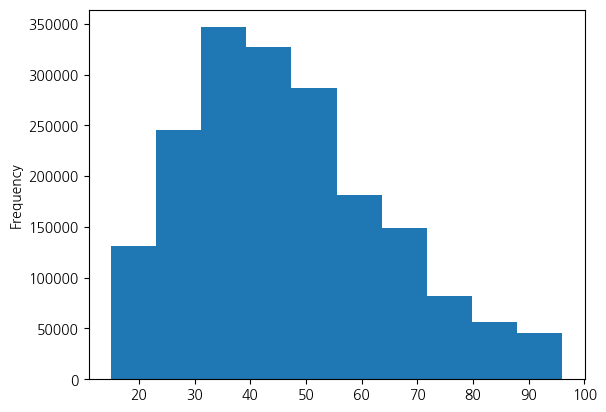

In [57]:
data['age'].plot(kind='hist')

In [46]:
data.groupby('age')['is_fraud'].mean()

age
15   0.002
16   0.003
17   0.004
18   1.000
19   0.007
20   0.006
21   0.005
22   0.006
23   0.005
24   0.011
25   0.005
26   0.005
27   0.005
28   0.004
29   0.005
30   0.005
31   0.004
32   0.004
33   0.004
34   0.006
35   0.003
36   0.003
37   0.004
38   0.005
39   0.004
40   0.003
41   0.004
42   0.003
43   0.004
44   0.005
45   0.003
46   0.004
47   0.004
48   0.004
49   0.004
50   0.006
51   0.006
52   0.009
53   0.006
54   0.006
55   0.005
56   0.008
57   0.009
58   0.006
59   0.009
60   0.007
61   0.006
62   0.007
63   0.010
64   0.006
65   0.004
66   0.005
67   0.006
68   0.007
69   0.004
70   0.006
71   0.007
72   0.006
73   0.007
74   0.007
75   0.006
76   0.005
77   0.012
78   0.007
79   0.009
80   0.012
81   0.007
82   0.007
83   0.009
84   0.008
85   0.006
86   0.010
87   0.007
88   0.016
89   0.006
90   0.004
91   0.006
92   0.007
93   0.008
94   0.004
95   1.000
96   0.010
Name: is_fraud, dtype: float64

In [58]:
data.groupby('age')['is_fraud'].value_counts()

age  is_fraud
15   0            2915
     1               7
16   0           10935
     1              32
17   0            5812
                 ...  
94   0            8750
     1              33
95   1              11
96   0             728
     1               7
Name: count, Length: 162, dtype: int64

In [69]:
data.columns

Index(['category', 'amt', 'gender', 'city_pop', 'job', 'is_fraud',
       'amt_iqr_max', 'amt_zscore', 'cat_amt_zscore', 'home_merch_dist',
       'dest_zscore', 'age'],
      dtype='object')

'trans_date_trans_time', 'dob' 삭제

In [70]:
data = data.drop(['trans_date_trans_time', 'dob' ], axis=1)

KeyError: "['trans_date_trans_time', 'dob'] not found in axis"

# 종속변수, 독립변수, 분리, 훈련, 테스트 데이터로 나누기

In [71]:
data2 = data.copy()

In [82]:
X =  data2.drop('is_fraud', axis=1)
y = data2['is_fraud']

In [83]:
y.value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [84]:
X = pd.get_dummies(X, drop_first=True)

In [85]:
X

,amt,city_pop,amt_iqr_max,amt_zscore,cat_amt_zscore,home_merch_dist,dest_zscore,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor, general practice","job_Doctor, hospital",job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,"job_Editor, 

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

* 홀드아웃, train, vaild, test 세가지로 만들기 (데이터가 충분함!)

In [87]:
X_train, X_valid, y_train, y_valid =  train_test_split(X,y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42
)

In [57]:
# 1차 분할: 전체 → train (60%), temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# 2차 분할: temp (40%) → valid (20%), test (20%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# 의사결정 나무로 분류하기

In [240]:
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(classification_report(y_valid, pred))
print("=" * 30, "test_result", "=" * 30)
test_pred = dtc.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.62      0.67      0.64      1930

    accuracy                           1.00    370479
   macro avg       0.81      0.83      0.82    370479
weighted avg       1.00      1.00      1.00    370479

============================== test_result ==============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.63      0.70      0.66      1930

    accuracy                           1.00    370479
   macro avg       0.81      0.85      0.83    370479
weighted avg       1.00      1.00      1.00    370479



In [241]:
for i in range(1, 11):
    dtc = DecisionTreeClassifier(max_depth=i, class_weight='balanced', random_state=42)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_valid)
    print(classification_report(y_valid, pred))
    print("=" * 30, f"test_result {i}", "=" * 30)
    test_pred = dtc.predict(X_test)
    print(classification_report(y_test, test_pred))
    print()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    368549
           1       0.12      0.75      0.21      1930

    accuracy                           0.97    370479
   macro avg       0.56      0.86      0.60    370479
weighted avg       0.99      0.97      0.98    370479

============================== test_result 1 ==============================
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    368549
           1       0.13      0.77      0.22      1930

    accuracy                           0.97    370479
   macro avg       0.56      0.87      0.60    370479
weighted avg       0.99      0.97      0.98    370479


              precision    recall  f1-score   support

           0       1.00      0.97      0.99    368549
           1       0.15      0.84      0.25      1930

    accuracy                           0.97    370479
   macro avg       0.57      0.91      0.62    3704

In [242]:
importance = pd.DataFrame(dtc.feature_importances_)
name = pd.DataFrame(dtc.feature_names_in_)
fi = pd.concat([importance,name], axis=1)

In [243]:
fi.columns = ['importance','name']

In [245]:
fi.sort_values(by='importance', ascending=False)[:100]

,importance,name
0,0.705,amt
4,0.169,cat_amt_zscore
7,0.017,age
10,0.014,category_grocery_net
11,0.013,category_grocery_pos
20,0.013,category_travel
8,0.012,category_food_dining
13,0.012,category_home
16,0.010,category_misc_pos
1,0.010,city_pop


random_forest로 분석하기

In [250]:
rfc = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=100)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_valid)
print("=" * 30, "valid_result", "=" * 30)
print(classification_report(y_valid, pred))
print("=" * 30, "valid_result", "=" * 30)
test_pred = dtc.predict(X_test)
print(classification_report(y_test, test_pred))

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.84      0.62      0.72      1930

    accuracy                           1.00    370479
   macro avg       0.92      0.81      0.86    370479
weighted avg       1.00      1.00      1.00    370479

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    368549
           1       0.13      0.96      0.22      1930

    accuracy                           0.97    370479
   macro avg       0.56      0.96      0.60    370479
weighted avg       1.00      0.97      0.98    370479



In [251]:
print(dtc.tree_max_depth)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_max_depth'

XGBOOST로 분석하기

In [253]:
y_train.value_counts()

is_fraud
0    1105645
1       5791
Name: count, dtype: int64

* xgb에서 소수 클래스에 가중치를 줄 때 값 계산
* scale_pos_weight = n_nagative / n_positive

In [254]:
1105645 / 5791

190.92471075807288

In [256]:
xgb = XGBRFClassifier(scale_pos_weight = 190, n_jobs=10, random_state=42 )
rfc.fit(X_train, y_train)
pred = rfc.predict(X_valid)
print("=" * 30, "valid_result", "=" * 30)
print(classification_report(y_valid, pred))
print("=" * 30, "valid_result", "=" * 30)
test_pred = rfc.predict(X_test)
print(classification_report(y_test, test_pred))

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.84      0.62      0.72      1930

    accuracy                           1.00    370479
   macro avg       0.92      0.81      0.86    370479
weighted avg       1.00      1.00      1.00    370479

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    368549
           1       0.13      0.96      0.22      1930

    accuracy                           0.97    370479
   macro avg       0.56      0.96      0.60    370479
weighted avg       1.00      0.97      0.98    370479



cat_Booster

In [258]:
cbc = CatBoostClassifier( class_weights=[1,190], thread_count=10, random_state=42 )
rfc.fit(X_train, y_train)
pred = rfc.predict(X_valid)
print("=" * 30, "valid_result", "=" * 30)
print(classification_report(y_valid, pred))
print("=" * 30, "valid_result", "=" * 30)
test_pred = rfc.predict(X_test)
print(classification_report(y_test, test_pred))

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.84      0.62      0.72      1930

    accuracy                           1.00    370479
   macro avg       0.92      0.81      0.86    370479
weighted avg       1.00      1.00      1.00    370479

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    368549
           1       0.13      0.96      0.22      1930

    accuracy                           0.97    370479
   macro avg       0.56      0.96      0.60    370479
weighted avg       1.00      0.97      0.98    370479



In [88]:
X.columns

Index(['amt', 'city_pop', 'amt_iqr_max', 'amt_zscore', 'cat_amt_zscore',
       'home_merch_dist', 'dest_zscore', 'age', 'category_food_dining',
       'category_gas_transport',
       ...
       'job_Visual merchandiser', 'job_Volunteer coordinator',
       'job_Warden/ranger', 'job_Warehouse manager',
       'job_Waste management officer', 'job_Water engineer',
       'job_Water quality scientist', 'job_Web designer',
       'job_Wellsite geologist', 'job_Writer'],
      dtype='object', length=518)

In [ ]:
for idx,col in enumerate(X.columns):
    if "/" in col:
        print(idx,col)
    elif "," in col:
        print(idx ,col)
    elif " " in col:
        print(idx ,col)

In [76]:
new_cols = []
for idx,col in enumerate(X.columns):
    print(col.replace(", ", "_").replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "").replace("'", ""))
    new_cols.append(col.replace(", ", "_").replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "").replace("'", ""))

amt
city_pop
amt_iqr_max
amt_zscore
cat_amt_zscore
home_merch_dist
dest_zscore
age
category_food_dining
category_gas_transport
category_grocery_net
category_grocery_pos
category_health_fitness
category_home
category_kids_pets
category_misc_net
category_misc_pos
category_personal_care
category_shopping_net
category_shopping_pos
category_travel
gender_M
job_Accountant_chartered
job_Accountant_chartered_certified
job_Accountant_chartered_public_finance
job_Accounting_technician
job_Acupuncturist
job_Administrator
job_Administrator_arts
job_Administrator_charities_voluntary_organisations
job_Administrator_education
job_Administrator_local_government
job_Advertising_account_executive
job_Advertising_account_planner
job_Advertising_copywriter
job_Advice_worker
job_Aeronautical_engineer
job_Agricultural_consultant
job_Aid_worker
job_Air_broker
job_Air_cabin_crew
job_Air_traffic_controller
job_Airline_pilot
job_Ambulance_person
job_Amenity_horticulturist
job_Analytical_chemist
job_Animal_nutri

In [89]:
print(len(new_cols))
print(len(X.columns))

518
518


In [90]:
X_train.columns = new_cols

In [91]:
X_train.columns

Index(['amt', 'city_pop', 'amt_iqr_max', 'amt_zscore', 'cat_amt_zscore',
       'home_merch_dist', 'dest_zscore', 'age', 'category_food_dining',
       'category_gas_transport',
       ...
       'job_Visual_merchandiser', 'job_Volunteer_coordinator',
       'job_Warden_ranger', 'job_Warehouse_manager',
       'job_Waste_management_officer', 'job_Water_engineer',
       'job_Water_quality_scientist', 'job_Web_designer',
       'job_Wellsite_geologist', 'job_Writer'],
      dtype='object', length=518)

In [93]:
X_train, X_valid, y_train, y_valid =  train_test_split(X,y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42
)

LightGBM

In [276]:
lxgb = LGBMClassifier( class_weight='balanced',n_jobs=10, random_state=42 )
rfc.fit(X_train, y_train)
pred = rfc.predict(X_valid)
print("=" * 30, "valid_result", "=" * 30)
print(classification_report(y_valid, pred))
print("=" * 30, "valid_result", "=" * 30)
test_pred = dtc.predict(X_test)
print(classification_report(y_test, test_pred))

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.84      0.62      0.72      1930

    accuracy                           1.00    370479
   macro avg       0.92      0.81      0.86    370479
weighted avg       1.00      1.00      1.00    370479

============================== valid_result ==============================
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    368549
           1       0.13      0.96      0.22      1930

    accuracy                           0.97    370479
   macro avg       0.56      0.96      0.60    370479
weighted avg       1.00      0.97      0.98    370479



# 랜덤포레스트로 하이퍼 파라미터 튜닝

In [ ]:
평균 깊이 추가

In [94]:
rfc = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=100)

In [95]:
params = dict(criterion=["gini", "entropy", "log_loss"], 
              max_depth=[150, 160, 170, 180, 200 ], 
              random_state =[42],
              class_weight=[None,"balanced"]
             )

In [ ]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=10, random_state=42)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_valid)
print("=" * 30, "valid_result", "=" * 30)
print("best_params: ", grid_cv.best_params_)
print("best_score_: ", grid_cv.best_score_)
print(classification_report(y_valid, pred))
print("=" * 30, "test_result", "=" * 30)
test_pred = rand_cv.predict(X_test)
print(classification_report(y_test, test_pred))

/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


메모리가 충분해야 실행 가능할듯

# 금융사기란?(Financial Fraud)
* 금융 거래에서 속이거나 기만해서 자산이나 돈을 획득하는 행위
* 주요유형
    * 신용카드, 사기
    * 피싱, 신분 도용
    * 보험사기
    * 돈세탁

# 금융사기 대응법
* 고객의 거래 패턴 분석, 비정상 거래 포착
* 전문가 기반 규칙 - 전문가들의 경험에 의한 사기 탐지
* 통계 기반 분석 - 수학적 모델, 통계학 기반 모델로 이상 탐지
* 머신러닝 기반 분석- 대규모 데이터 학습, 전문가 기반, 통계기반으로 찾지 못하는 사기도 탐지 가능

# 금융 사기 탐지의 어려움
* 사기 확인이 피해자 불만 표현을 통해서 이루어지는 경우가 많음.
* 사기 거래 자체가 적음 => 데이터 확보가 어려움.
* 데이터 부족으로 인해 성능이 좋은 모델 형성이 어려움
* 가상 데이터를 인공적으로 생성해서 모델 생성에 활용

# 사기 방지와 고객 경험의 균형
* 정당한 거래가 차단되어 고객에게 좋지 않은 사용경험을 주는 경우
* 엄격한 탐지 -> 사용자 불편 증가
* 관대한 탐지 -> 사기율 상승
* 적절한 타협이 필요